In [1]:
import os
import sys
import json
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget

sys.path.insert(0, os.path.abspath(r'..\..'))
import AetheriaPackage.tail_plotter_tools as tpt

results_path = r'C:\Users\Alfon\OneDrive - Delft University of Technology\Honours\02 Python\Honours Project\AetheriaPackage\output\_beta_sensitivity_new'

'''
columns: [ Class | Categoray | Unit | Alias (optional) ]

'''
study_var = [['Wing', 'aspect_ratio', '-'],
             ['Wing', 'surface', r'$m^2$', 'wing_surface'],
             ['Wing', 'span', 'm'],
             ['Fuselage', 'length_fuselage', 'm'],
             ['Fuselage', 'beta_crash', '-'],
             ['Fuselage', 'length_tail', 'm'],
             ['Fuselage', 'length_tank', 'm'],
             ['Fuselage', 'height_fuselage_outer', 'm'],
             ['Fuselage', 'height_fuselage_inner', 'm'],
             ['Fuselage', 'width_fuselage_inner', 'm'],
             ['Fuselage', 'width_fuselage_outer', 'm'],
             ['Fuselage', 'tank_radius', 'm'],
             ['Fuselage', 'volume_powersys', r'$m^3$'],
             ['Fuselage', 'bc', 'm'],
             ['Fuselage', 'hc', 'm'],
             ['Fuselage', 'bf', 'm'],
             ['Fuselage', 'hf', 'm'],
             ['AircraftParameters', 'MTOM', 'Kg'],
             ['AircraftParameters', 'mission_energy', 'J'],
             ['AircraftParameters', 'mission_time', 's'],
             ['AircraftParameters', 'max_thrust', 'N'],
             ['AircraftParameters', 'TW_max', '-'],
             ['AircraftParameters', 'OEM', 'Kg'],
             ['AircraftParameters', 'wing_loading_cruise', 'N/m'],
             ['Wing', 'x_lewing', 'm'], #position of LEMAC of main wing relative to nose of ac
             ['Veetail', 'length_wing2vtail', 'm'], # position of LEMAC of veetail relative to LEMAC of main wing
             ['Veetail', 'surface', r'$m^2$', 'veetail_surface'],
             ]

# generate aliases

for i, var in enumerate(study_var):
    if len(var) != 4:
        study_var[i].append(var[1])


In [2]:
def search_json(dir, search_term, save_lst=list([])):
    for f in os.listdir(dir):
        if os.path.isdir(os.path.join(dir, f)):
            search_json(os.path.join(dir, f), search_term, save_lst)
        elif os.path.splitext(f)[-1] == '.json' and search_term in f:
            save_lst.append(os.path.join(dir, f))
    
    return save_lst

In [3]:
# extracting data into pandas DataFrame

data_files = search_json(results_path, 'design')
n_ac = len(data_files)
study_data = {}

for var in study_var:
    study_data[var[3]] = list([])


for file_path in data_files:
    with open(file_path, 'r') as f:
        all_data = json.load(f)

    for var in study_var:
        study_data[var[3]].append(all_data[var[0]][var[1]])

study_data = pd.DataFrame(study_data)

study_data

,aspect_ratio,wing_surface,span,length_fuselage,beta_crash,length_tail,length_tank,height_fuselage_outer,height_fuselage_inner,width_fuselage_inner,...,MTOM,mission_energy,mission_time,max_thrust,TW_max,OEM,wing_loading_cruise,x_lewing,length_wing2vtail,veetail_surface
0,6.376990,16.799692,10.350433,22.436379,0.300,17.277379,9.311959,2.00911,1.80911,2.08,...,3228.546220,1.067247e+09,6127.135676,37993.467490,1.237427,2718.546220,1885.275,12.177609,9.982291,4.678491
1,7.972972,16.671726,11.529232,19.102030,0.325,13.943030,7.528702,2.00911,1.80911,2.08,...,3203.951074,1.007704e+09,6295.149108,37704.066191,1.237427,2693.951074,1885.275,10.573043,8.498792,5.514024
2,8.381495,16.579717,11.788249,17.473639,0.350,12.314639,6.660176,2.00911,1.80911,2.08,...,3186.272068,1.029467e+09,6332.142805,37495.982847,1.237427,2676.272068,1885.275,9.747386,7.774286,6.097051
3,8.275001,16.340846,11.628436,16.318646,0.375,11.159646,6.045224,2.00911,1.80911,2.08,...,3140.163599,1.068071e+09,6305.257841,36955.761910,1.237427,2630.163599,1885.275,9.168419,7.066214,6.301944
4,9.399999,16.974645,12.631771,15.452067,0.400,10.293067,5.582345,2.00911,1.80911,2.08,...,3261.353265,1.117823e+09,6398.177495,38389.135783,1.237427,2751.353265,1885.275,8.588436,6.784850,6.559458
5,9.399999,16.973980,12.631524,14.760648,0.425,9.601648,5.217573,2.00911,1.80911,2.08,...,3262.179819,1.173872e+09,6402.186837,38387.630162,1.237427,2752.179819,1885.275,8.182602,6.567743,7.145132
6,8.306249,16.342816,11.651073,14.179595,0.450,9.020595,4.910772,2.00911,1.80911,2.08,...,3140.877400,1.232768e+09,6302.914615,36960.217590,1.237427,2630.877400,1885.275,7.991671,6.225313,7.621665
7,7.322890,16.411154,10.962530,13.899816,0.475,8.740816,4.762547,2.00911,1.80911,2.08,...,3154.045464,1.327945e+09,6240.074913,37114.766972,1.237427,2644.045464,1885.275,7.792799,6.019729,7.993194
8,6.900001,16.276641,10.597586,13.873394,0.480,8.714394,4.749888,2.00911,1.80911,2.08,...,3127.999017,1.351409e+09,6214.212323,36810.557635,1.237427,2617.999017,1885.275,7.846780,6.008598,8.264726
9,6.899999,16.295104,10.603594,13.785525,0.485,8.626525,4.704000,2.00911,1.80911,2.08,...,3131.664654,1.364978e+09,6211.480310,36852.313271,1.237427,2621.664654,1885.275,7.791580,5.969134,8.345788


C:\Users\Alfon\AppData\Local\Temp\ipykernel_8744\3097689059.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure().add_subplot(projection='3d')


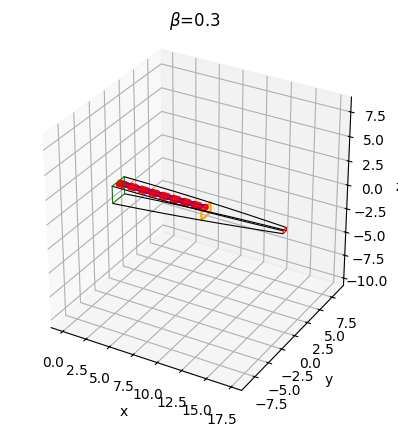

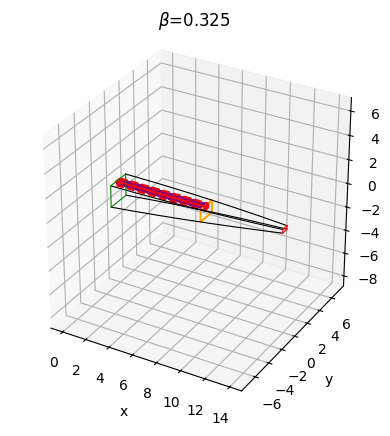

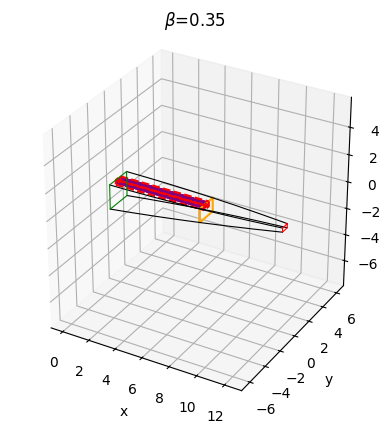

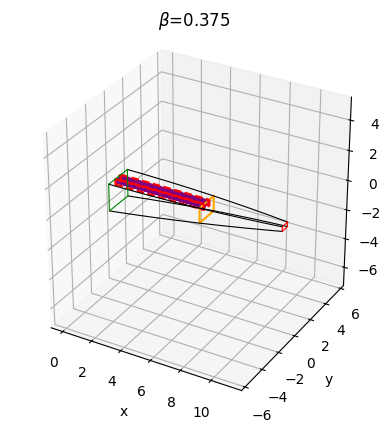

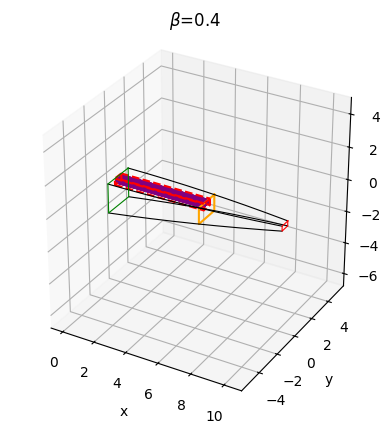

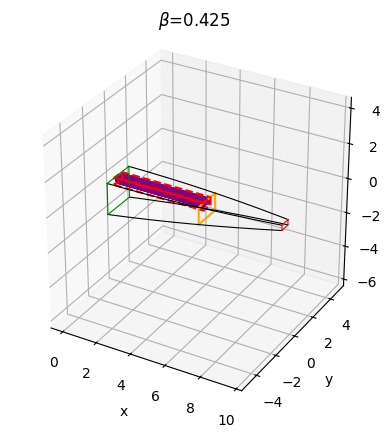

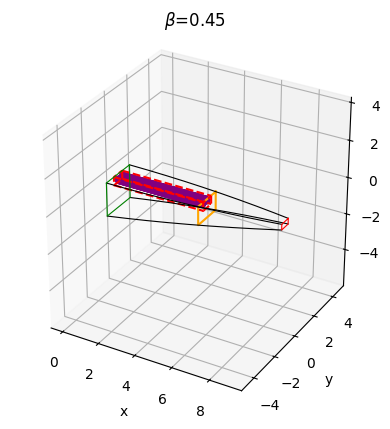

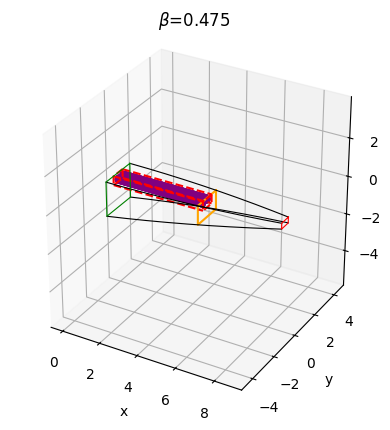

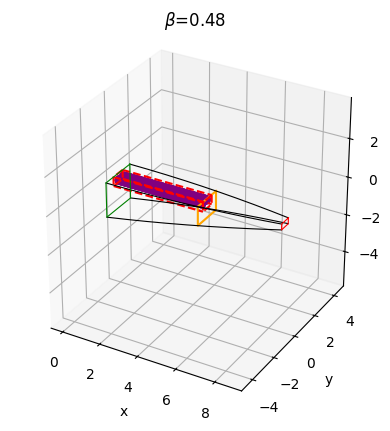

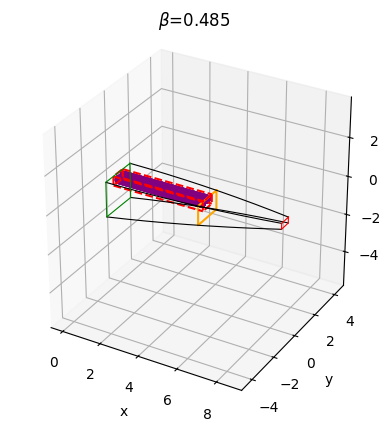

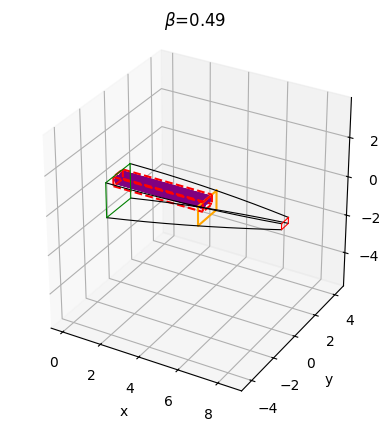

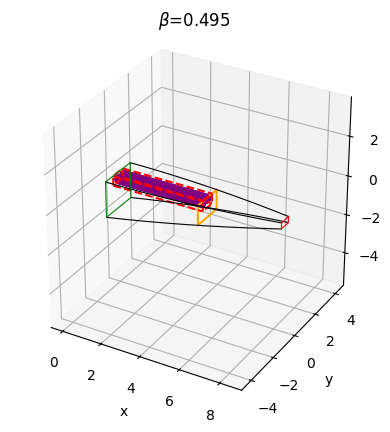

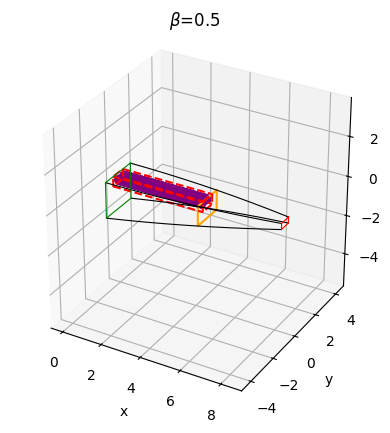

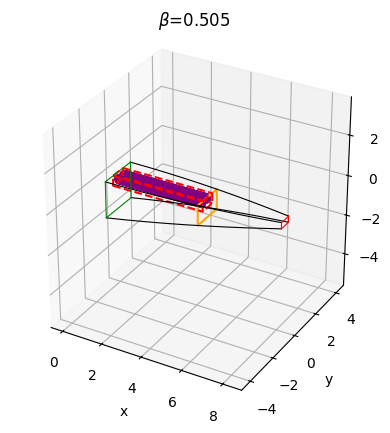

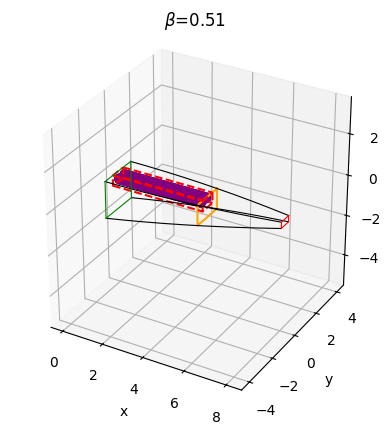

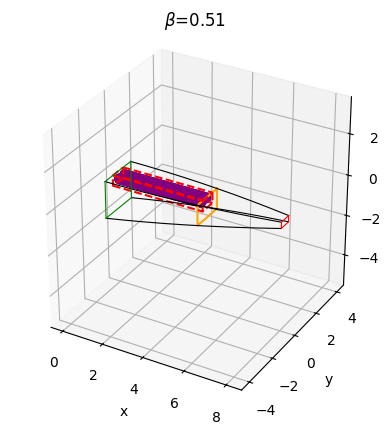

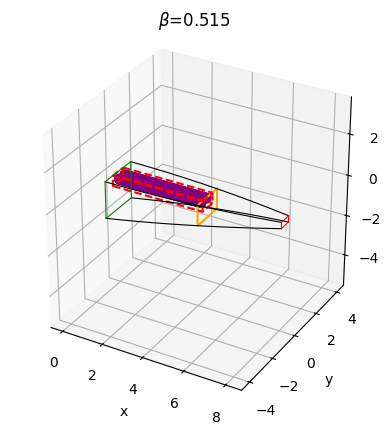

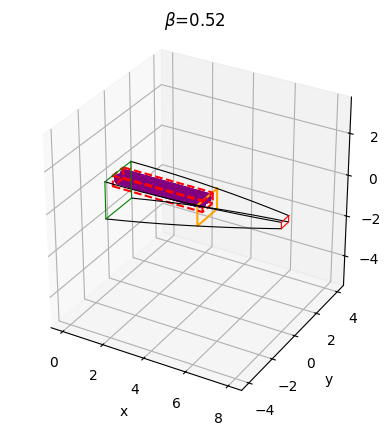

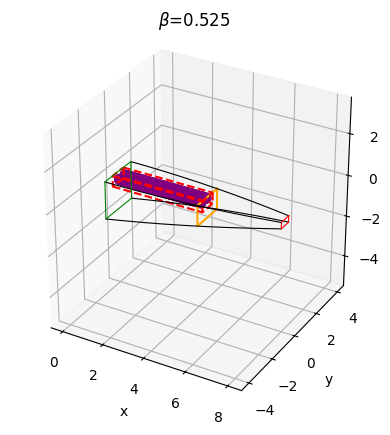

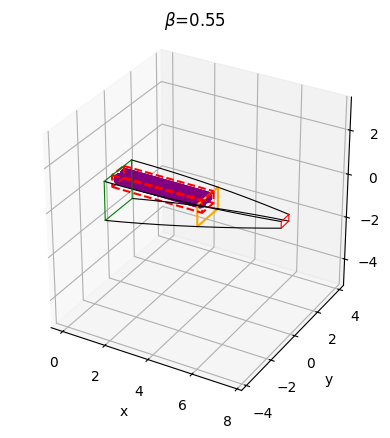

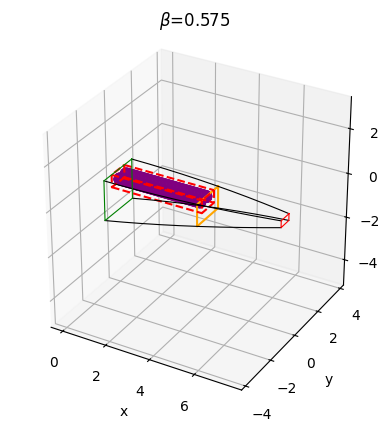

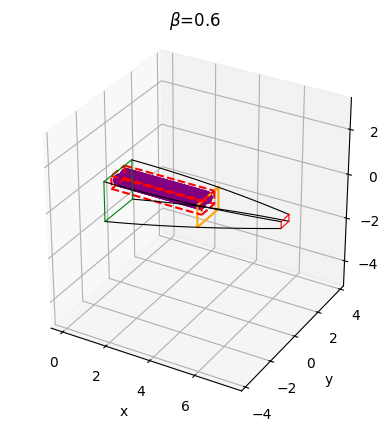

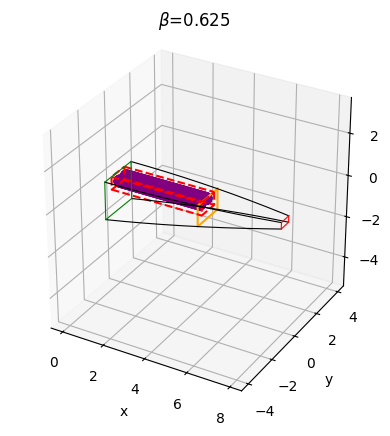

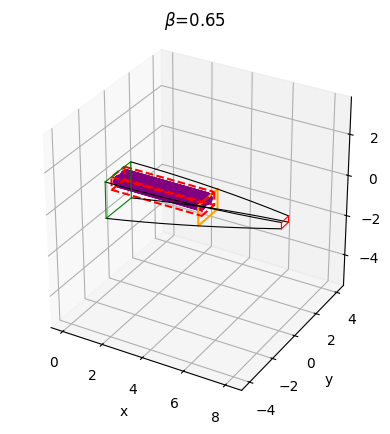

In [6]:
# plotting each tail

if not os.path.exists('tail_plots'):
    os.mkdir('tail_plots')

for i in range(n_ac):
    ac = study_data.loc[i]
    
    ax = plt.figure().add_subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(rf'$\beta$={ac['beta_crash']}')

    tpt.plot_complete_tail(l_tail=ac['length_tail'],
                           l_tank=ac['length_tank'],
                           h0=ac['height_fuselage_inner'],
                           b0=ac['width_fuselage_inner'],
                           hc=ac['hc'],
                           bc=ac['bc'],
                           bf=ac['bf'],
                           hf=ac['hf'],
                           r_tank=ac['tank_radius'],
                           linear_rel='AR',
                           ax=ax)
    plt.savefig(rf'tail_plots//{dt.datetime.now():%m-%d} - beta={ac['beta_crash']}.png', dpi=300)
    # plt.clf()
    


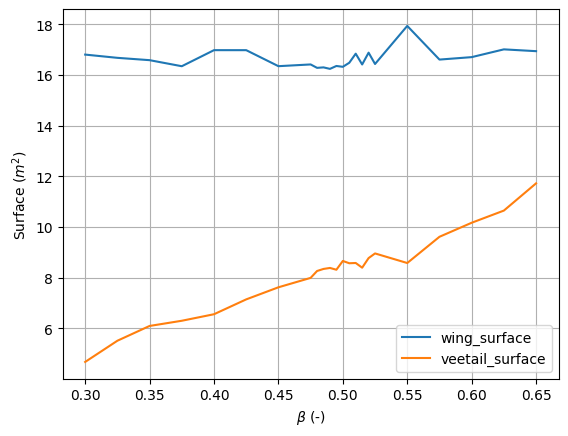

In [7]:
# plot a single beta graph

tar_var_lst = ['wing_surface', 'veetail_surface']
# search for units
tar_unit_lst = []
for tar_var in tar_var_lst:
    for var_lst in study_var:
        if tar_var in var_lst: tar_unit_lst.append(var_lst[2])

# var = 'x_LEMAC_veetail'
plt.plot(study_data['beta_crash'], study_data[tar_var_lst[0]], label=tar_var_lst[0])
plt.plot(study_data['beta_crash'], study_data[tar_var_lst[1]], label=tar_var_lst[1])
# # plt.plot(study_data['beta_crash'], study_data[tar_var_lst[2]], label='length_fuselage')
plt.xlabel(r'$\beta$ (-)')
plt.ylabel(rf'Surface ({tar_unit_lst[0]})')
plt.legend()
plt.grid()
plt.savefig(rf'beta_plots//{dt.datetime.now():%m-%d} - beta-surfaces.png')


In [4]:
# plotting all beta graphs

if not os.path.exists('beta_plots'):
    os.mkdir('beta_plots')

for (cvar, var, unit) in study_var:
    if var == 'beta_crash': continue
    
    plt.plot(study_data['beta_crash'], study_data[var])
    plt.xlabel(r'$\beta$ (-)')
    plt.ylabel(rf'{var} ({unit})')
    plt.grid()

    plt.savefig(rf'beta_plots//{dt.datetime.now():%m-%d} - beta-{var}.png', dpi=300)
    # plt.show()
    plt.clf()

<Figure size 640x480 with 0 Axes>

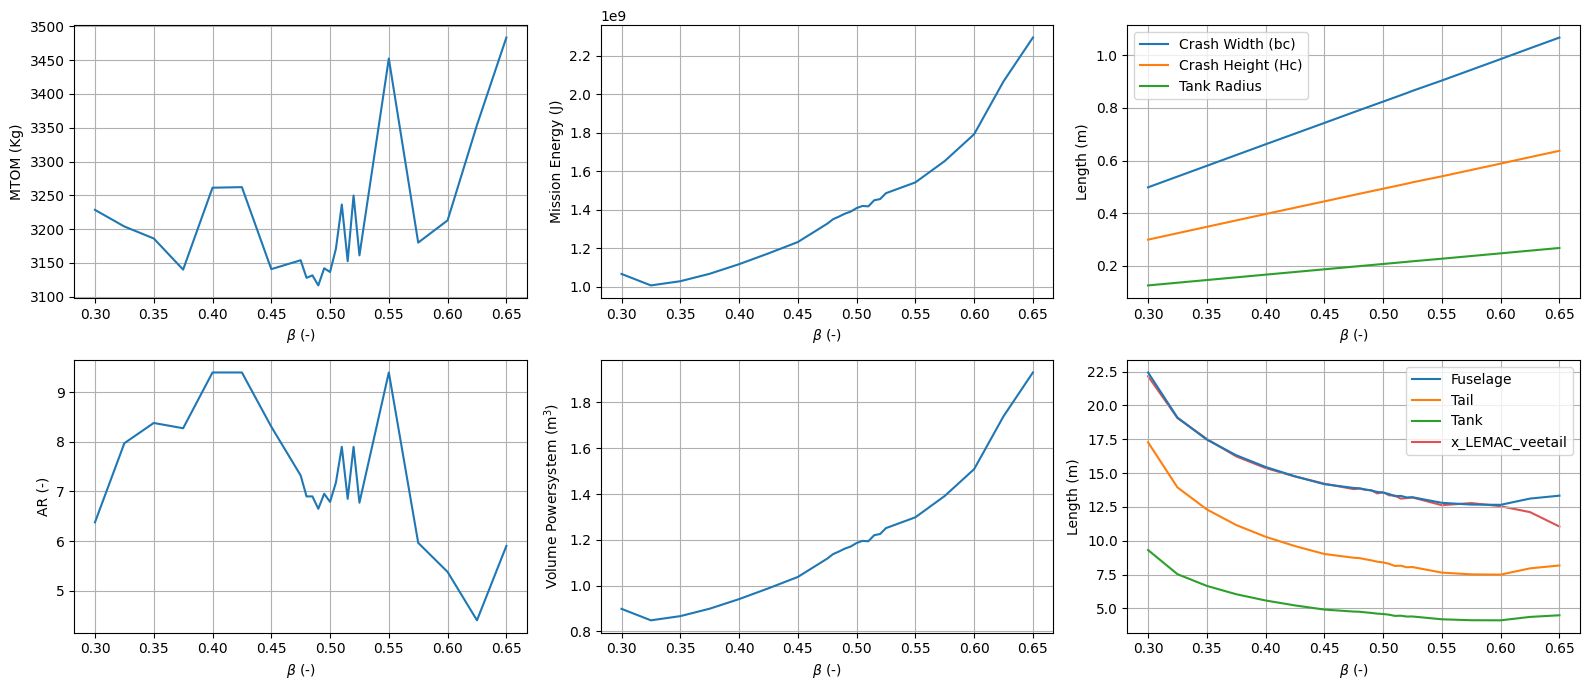

In [9]:
# plotting interesting beta graphs
'''
interesting figures
- MTOM
- aspect ratio
- mission_energy
- surface
- volume_powersys
- bc, hc, tank_radius
- length_fuselage, length_tail, length_tank

- mission_time (follows trend of aspect_ratio)
- max_thrust (follows trend of MTOM, as TW_max is constant)
- surface (follows trend of MTOM, as wing loading const)
- span (follows trend of aspect_ratio)
'''

fig, axs = plt.subplots(2, 3, figsize=(16,7))
opt_lim = {'MTOM': 3175, 'length_fuselage': 14, 'AR': [5, 15]}
overlay_constraints = False

b_min = np.min(study_data['beta_crash'])
b_max = np.max(study_data['beta_crash'])

ax = axs[0, 0]
ax.plot(study_data['beta_crash'], study_data['MTOM'])
if overlay_constraints:
    ax.hlines(opt_lim['MTOM'], b_min, b_max, ls='--', color='red', alpha=0.7)
    ax.text( 0.00*(b_max-b_min)+b_min, opt_lim['MTOM'], 'MTOM constraint', color='red')
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'MTOM (Kg)')
ax.grid()

ax = axs[1, 0]
ax.plot(study_data['beta_crash'], study_data['aspect_ratio'])
if overlay_constraints:
    ax.hlines(opt_lim['AR'][0], b_min, b_max, ls='--', color='red', alpha=0.7)
    ax.text( 0.00*(b_max-b_min)+b_min, opt_lim['AR'][0], 'AR constraint', color='red')
    ax.hlines(opt_lim['AR'][1], b_min, b_max, ls='--', color='red', alpha=0.7)
    ax.text( 0.00*(b_max-b_min)+b_min, opt_lim['AR'][1], 'AR constraint', color='red')
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'AR (-)')
ax.grid()

ax = axs[0, 1]
ax.plot(study_data['beta_crash'], study_data['mission_energy'])
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'Mission Energy (J)')
ax.grid()

ax = axs[1, 1]
ax.plot(study_data['beta_crash'], study_data['volume_powersys'])
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'Volume Powersystem (m$^3$)')
ax.grid()

ax = axs[0, 2]
ax.plot(study_data['beta_crash'], study_data['bc'], label='Crash Width (bc)')
ax.plot(study_data['beta_crash'], study_data['hc'], label='Crash Height (Hc)')
ax.plot(study_data['beta_crash'], study_data['tank_radius'], label='Tank Radius')
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'Length (m)')
ax.legend()
ax.grid()

ax = axs[1, 2]
ax.plot(study_data['beta_crash'], study_data['length_fuselage'], label='Fuselage')
if overlay_constraints:
    ax.hlines(opt_lim['length_fuselage'], b_min, b_max, ls='--', color='red', alpha=0.7)
    ax.text(0.60*(b_max-b_min)+b_min, opt_lim['length_fuselage'], 'fuselage constraint', color='red')
ax.plot(study_data['beta_crash'], study_data['length_tail'], label='Tail')
ax.plot(study_data['beta_crash'], study_data['length_tank'], label='Tank')
ax.plot(study_data['beta_crash'], study_data['x_lewing']+study_data['length_wing2vtail'], label='x_LEMAC_veetail', alpha=0.8, zorder=1.5)
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'Length (m)')
ax.legend()
ax.grid()

fig.tight_layout()

plt.savefig(rf'beta_plots\\{dt.datetime.now():%m-%d} - plots of interest (wo bounds) 2.png', dpi=300)
